In [103]:
import pandas as pd

In [146]:
df = pd.read_csv('instagram.csv')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Influencer insta name     1000 non-null   object
 1   instagram name            979 non-null    object
 2   category_1                892 non-null    object
 3   category_2                287 non-null    object
 4   Followers                 1000 non-null   object
 5   Audience country(mostly)  986 non-null    object
 6   Authentic engagement
    1000 non-null   object
 7   Engagement avg
          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [148]:
df.describe()

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
count,1000,979,892,287,1000,986,1000,1000
unique,997,975,31,27,411,32,850,778
top,angelinajolie,Bruno Goes 🎭,Music,Cinema & Actors/actresses,6M,United States,1.1M,1.1M
freq,2,2,235,59,11,279,22,28


In [149]:
#corrijo nombres de las columnas para mantener formato snake
df.columns = ['cuenta_instagram', 'nombre_del_influencer', 'categoria_principal',
              'categoria_alternativa', 'seguidores', 'pais_audiencia', 'engagement',
              'engagement_promedio']


In [150]:
df = df.drop(columns = ['categoria_alternativa'])

In [151]:
#en el caso de no tener el instagram del influencer, consideramos su nombre como el nombre de la cuenta.
#optamos por hacer esto por el hecho de que estos valors NaN si tienen informacion en los campos de seguidores
#y de engagement
df['cuenta_instagram'] = df['cuenta_instagram'].fillna(df['nombre_del_influencer'])

In [152]:
#en el caso del resto de las categorias utilizaremos el valor arbitrario "no tiene" para llenar los missing values.
df = df.fillna('no tiene')

In [153]:
#elimino duplicados
df = df.drop_duplicates(subset=['nombre_del_influencer'])

In [154]:
#transformaciones para poder operar
for i in df.columns:
    if i == 'engagement' or i == 'engagement_promedio' or i == 'seguidores':
        df[i] = df[i].replace({'K': '*1000', 'M': '*1000000'}, regex=True).map(pd.eval).astype(float)

In [155]:
#creo columnas calculadas para el analisis
df['porcentaje_engaged'] = df['engagement_promedio']/df['seguidores']*100

<AxesSubplot:>

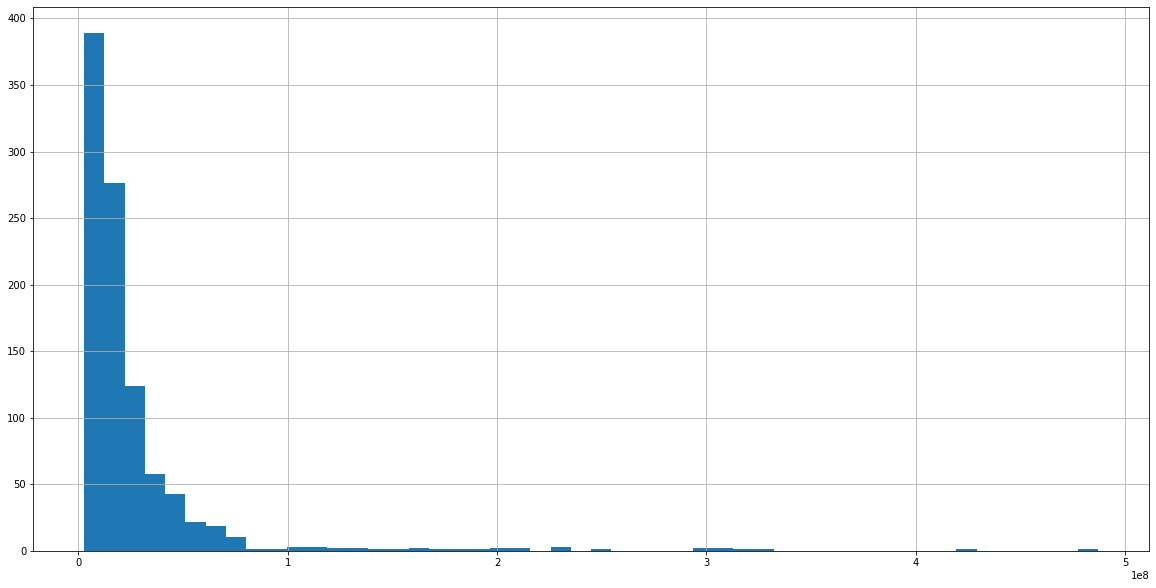

In [156]:
#veo la distribucion por cantidad de seguidores
df.seguidores.hist(bins=50, figsize = (20,10))


In [157]:
seguidores_mean = df.seguidores.mean()
seguidores_std = df.seguidores.std()

In [158]:
lower_limit = seguidores_mean - 3 * seguidores_std
upper_limit = seguidores_std + 3 * seguidores_std

#no hay valores por debajo del lower limit
#se opta por no eliminar los valore por encima del maximo visto que muestran a los "mas famosos" - 
#messi, beyonce, justin bieber, etc.

In [159]:
#datos generales del df - TABLA TOP 5
df_top5 = df.nlargest(5,['seguidores'])
print(df_top5)

    cuenta_instagram nombre_del_influencer categoria_principal   seguidores  \
388        instagram             Instagram         Photography  487200000.0   
203        cristiano     Cristiano Ronaldo  Sports with a ball  419600000.0   
510      kyliejenner               Kylie 🤍             Fashion  323300000.0   
532         leomessi             Leo Messi  Sports with a ball  315400000.0   
814      selenagomez          Selena Gomez               Music  308200000.0   

    pais_audiencia  engagement  engagement_promedio  porcentaje_engaged  
388          India    352300.0             467400.0            0.095936  
203          India   5700000.0            7000000.0            1.668255  
510  United States   7600000.0           12300000.0            3.804516  
532      Argentina   4000000.0            5300000.0            1.680406  
814  United States   3300000.0            4400000.0            1.427644  


/Applications/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:137: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


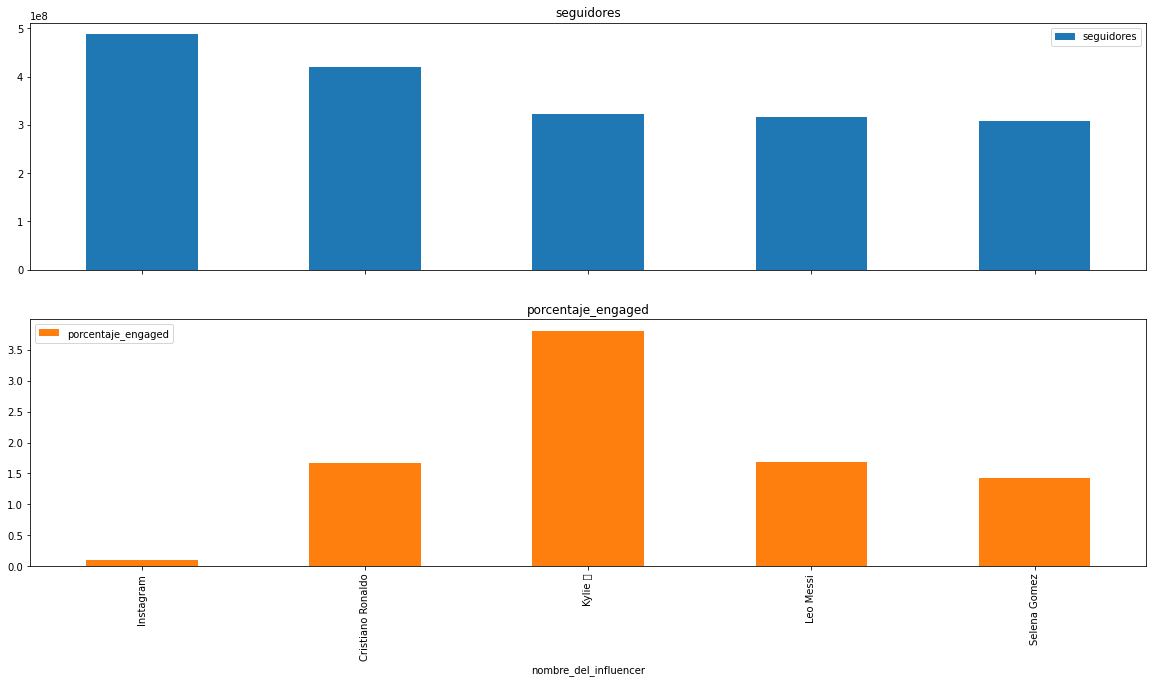

In [160]:
#Grafuca top 5
graph_top5 = df_top5.drop(columns = ['engagement', 'engagement_promedio'])
ax = graph_top5.plot.bar(x= 'nombre_del_influencer', rot = 90, subplots=True, sort_columns = True, figsize = (20,10))

ax[1].legend(loc=2)  

In [161]:
#Defino tabla por pais
df_alt = df[df.pais_audiencia != 'no tiene']
df_por_pais = df_alt.groupby(['pais_audiencia']), index_col = 0).mean()

SyntaxError: cannot assign to function call (2915071811.py, line 3)

In [162]:
#Defino tabla por cateogria
df_alt = df[df.categoria_principal != 'no tiene']
df_por_categoria = df_alt.groupby(['categoria_principal']).mean()

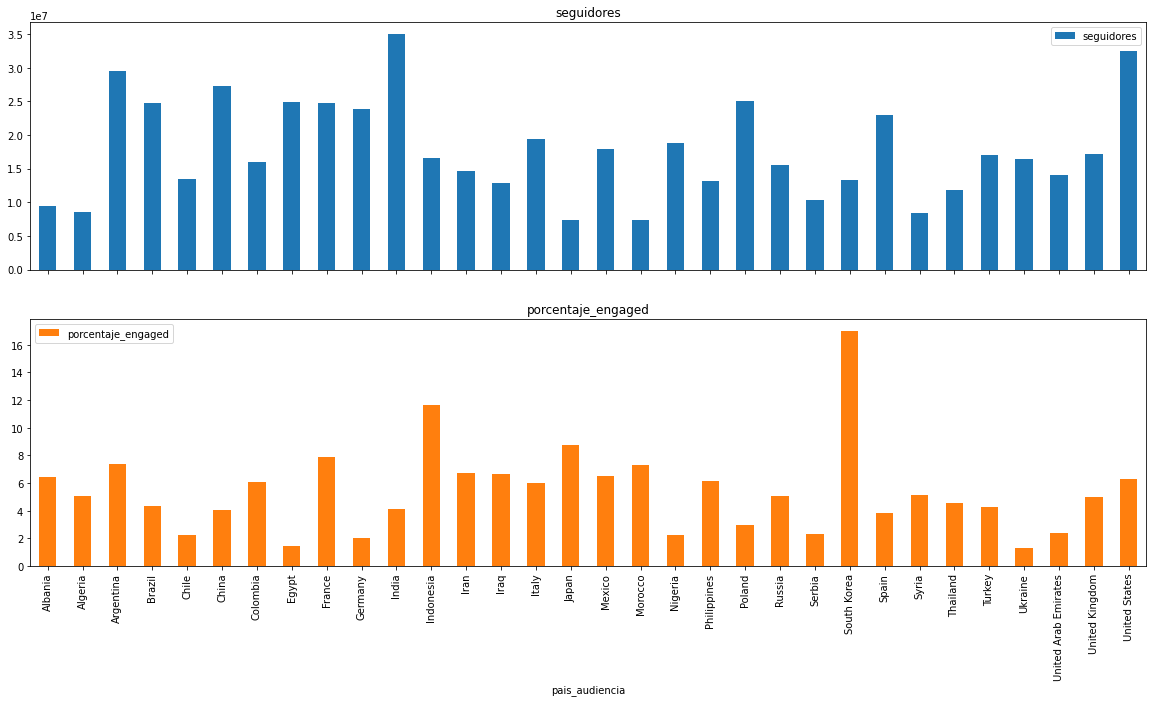

In [163]:
#Graficas por pais, compartiendo el mismo eje x
graph_por_pais = df_por_pais.drop(columns = ['engagement', 'engagement_promedio'])
ax = graph_por_pais.plot.bar(rot = 90, subplots=True, sort_columns = True, figsize = (20,10))

ax[1].legend(loc=2)  

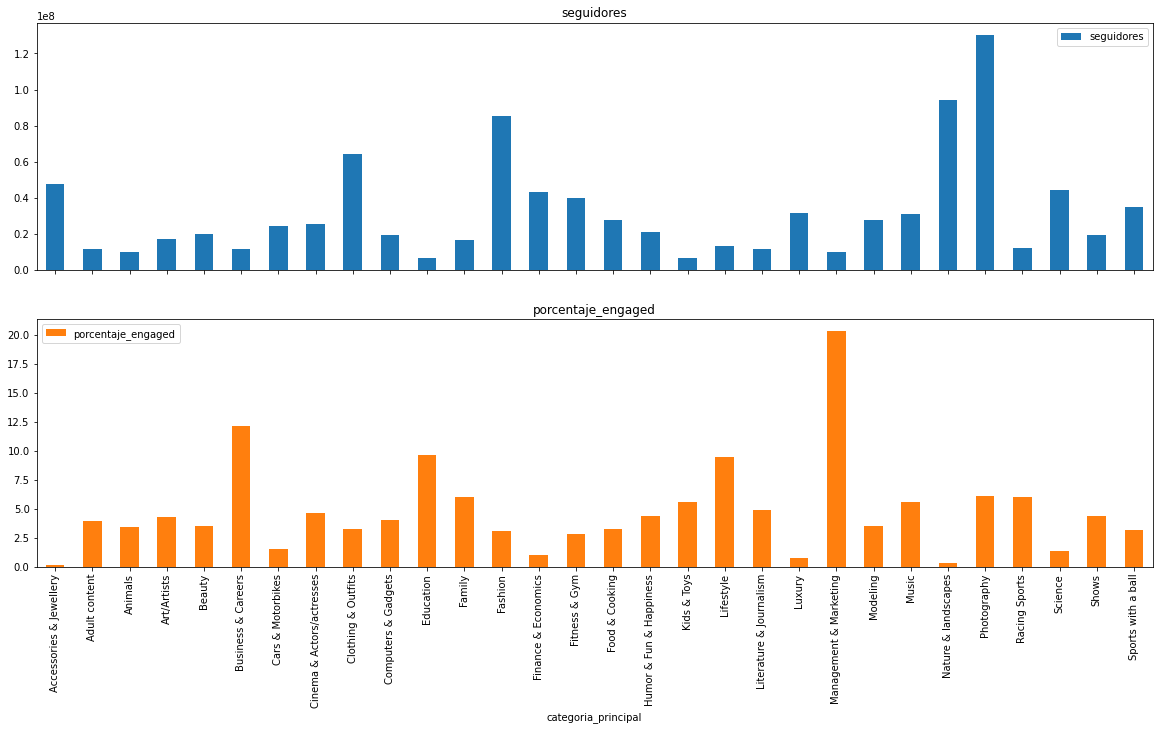

In [164]:
#Graficas por categoria, compartiendo el mismo eje x
graph_por_categoria = df_por_categoria.drop(columns = ['engagement', 'engagement_promedio'])
ax = graph_por_categoria.plot.bar(rot = 90, subplots=True, sort_columns = True, figsize=(20,10))

ax[1].legend(loc=2)

In [165]:
#Defino formato de tablas para usar en Markdown - NO FUNCIONA
#! pip install tabulate
#df_top5.to_markdown()


In [166]:
#hago mismo analisis eliminando los outliers para ver si se mantiene la relacion entre seguidores y engagment
df_sin_upper= df[(df['seguidores'] < upper_limit)]


In [167]:
df_sin_upper

,cuenta_instagram,nombre_del_influencer,categoria_principal,seguidores,pais_audiencia,engagement,engagement_promedio,porcentaje_engaged
0,433,433,Sports with a ball,48500000.0,Spain,383100.0,637000.0,1.313402
1,__youngbae__,TAEYANG,Music,12700000.0,Indonesia,478000.0,542300.0,4.270079
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,18800000.0,Russia,310800.0,377900.0,2.010106
3,_imyour_joy,Joy,Lifestyle,13500000.0,Indonesia,1100000.0,1400000.0,10.370370
4,_jeongjaehyun,Jaehyun,no tiene,11100000.0,Indonesia,2500000.0,3100000.0,27.927928
...,...,...,...,...,...,...,...,...
995,zendaya,Zendaya,Cinema & Actors/actresses,136100000.0,United States,6400000.0,8600000.0,6.318883
996,zidane,zidane,Sports with a ball,31200000.0,Spain,546000.0,744100.0,2.384936
997,zkdlin,KAI,Music,13900000.0,Indonesia,1300000.0,1600000.0,11.510791
998,zoeisabellakravitz,Zoë Kravitz,Cinema & Actors/actresses,8200000.0,United States,583000.0,885500.0,10.798780


In [169]:
#repito pasos anteriores ahora sin los outliers
#datos generales del df - TABLA TOP 5
df_top5_alt = df_sin_upper.nlargest(5,['seguidores'])
print(df_top5_alt)

    cuenta_instagram nombre_del_influencer        categoria_principal  \
630       mileycyrus           Miley Cyrus                      Music   
475        katyperry            KATY PERRY                      Music   
485   kevinhart4real            Kevin Hart  Cinema & Actors/actresses   
995          zendaya               Zendaya  Cinema & Actors/actresses   
225         ddlovato           Demi Lovato                      Music   

      seguidores pais_audiencia  engagement  engagement_promedio  \
630  163800000.0  United States    439700.0             594900.0   
475  156600000.0         Brazil    231800.0             302600.0   
485  140200000.0  United States    111300.0             141000.0   
995  136100000.0  United States   6400000.0            8600000.0   
225  128700000.0  United States    319800.0             418400.0   

     porcentaje_engaged  
630            0.363187  
475            0.193231  
485            0.100571  
995            6.318883  
225            0.32509

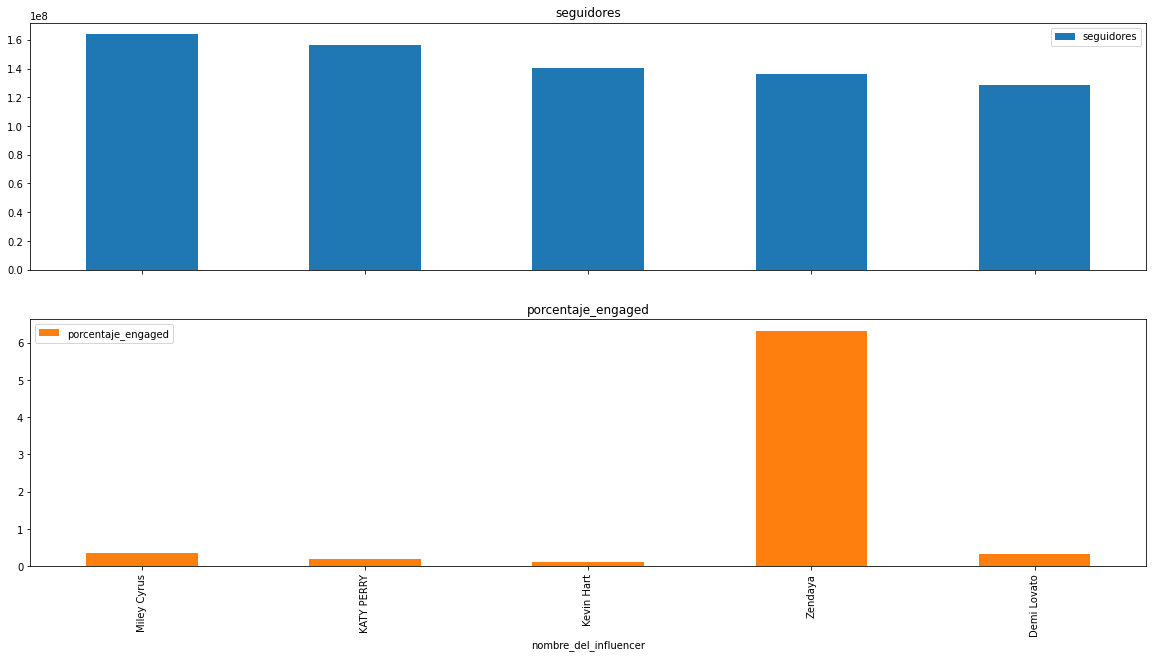

In [170]:
#Grafuca top 5
graph_top5_alt = df_top5_alt.drop(columns = ['engagement', 'engagement_promedio'])
ax = graph_top5_alt.plot.bar(x= 'nombre_del_influencer', rot = 90, subplots=True, sort_columns = True, figsize = (20,10))

ax[1].legend(loc=2)  

In [171]:
#Defino tabla por pais
df_alt = df_sin_upper[df_sin_upper.pais_audiencia != 'no tiene']
df_por_pais = df_alt.groupby(['pais_audiencia']), index_col = 0).mean()

SyntaxError: cannot assign to function call (906551264.py, line 3)

In [172]:
#Defino tabla por cateogria
df_alt = df_sin_upper[df_sin_upper.categoria_principal != 'no tiene']
df_por_categoria = df_alt.groupby(['categoria_principal']).mean()

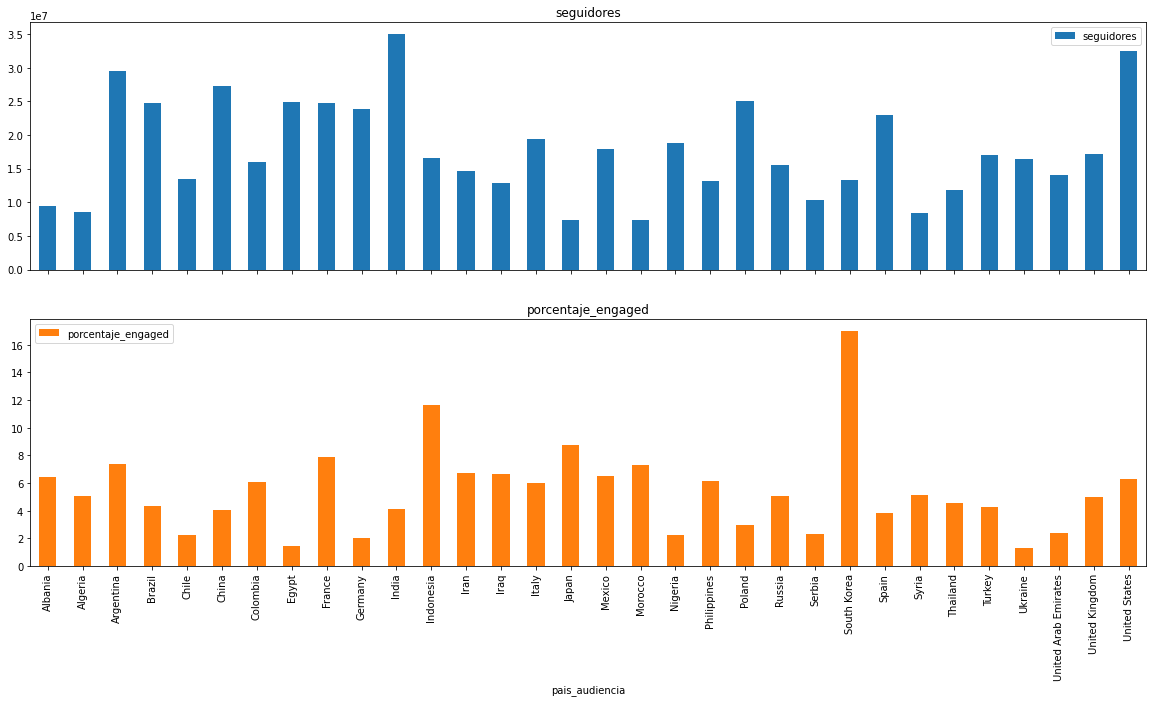

In [173]:
#Graficas por pais, compartiendo el mismo eje x
graph_por_pais_alt = df_por_pais.drop(columns = ['engagement', 'engagement_promedio'])
ax = graph_por_pais_alt.plot.bar(rot = 90, subplots=True, sort_columns = True, figsize = (20,10))

ax[1].legend(loc=2)  

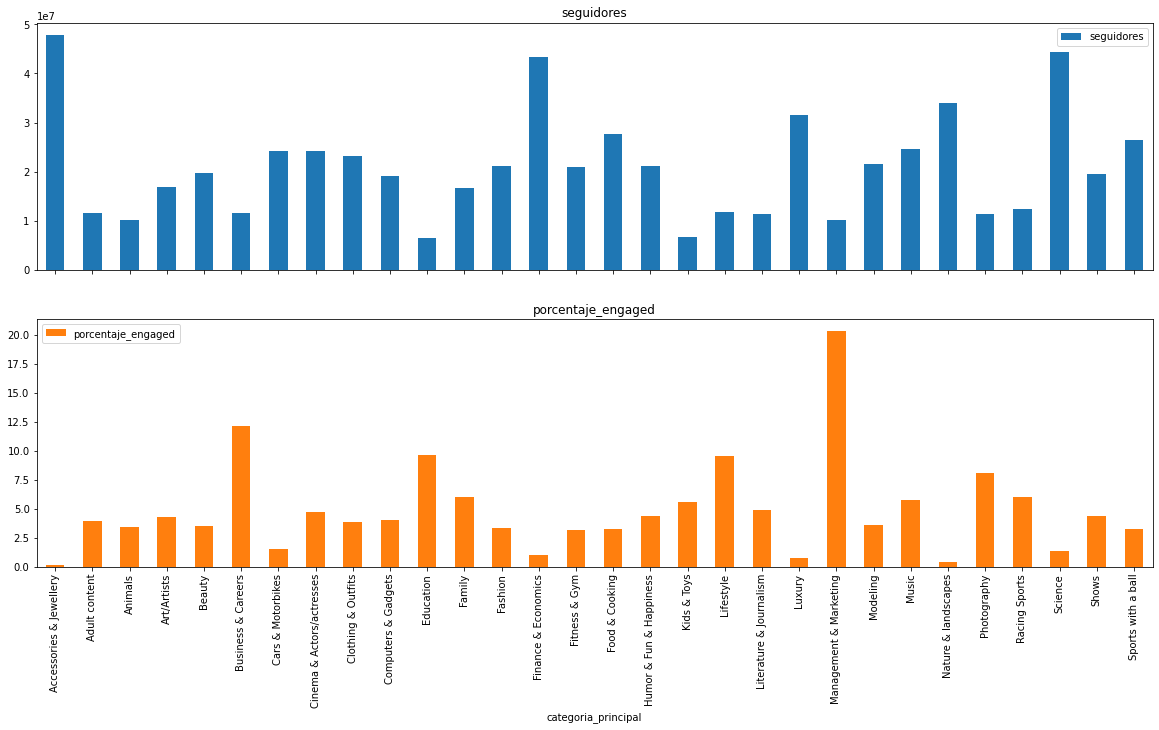

In [174]:
#Graficas por categoria, compartiendo el mismo eje x
graph_por_categoria_alt = df_por_categoria.drop(columns = ['engagement', 'engagement_promedio'])
ax = graph_por_categoria_alt.plot.bar(rot = 90, subplots=True, sort_columns = True, figsize=(20,10))

ax[1].legend(loc=2)